# What is a clock?

![](https://philosophyinseconds.files.wordpress.com/2015/08/achilles-and-the-tortoise.jpg)

> **Achilles**: "_...eh, a clock you ask? well everybody knows, that's something that measures the passage of time_"

> **Turtle**: "_Ok, then, tell me, what is time_??_"

> **Achiless**: "_oh...eh...I think you got me again...May I have a 'moment'?_"

In Physics, a clock is simply any periodic process, that is, a process that repeats over and over and over "endlessly". Time is then simply a count of how many times the process has repeated since we started counting...

There are many processes in nature that give rise to a clock. 

What follows are examples of systems that give rise to clocks and that can be described with what's called _differential equations_. 

A key feature in order to obtain a clock is that those systems need to have two or more **coupled "parts"**. These coupled parts may as well have what's called **non-linear terms** that describe **interactions** . We need to _define_ what mean here by **parts, coupled and non-linear terms/interactions**. Let's define first the latter concept and then make our way back to the first one.

What is a non-linear term? Think on the following: You made an initial awesome investment such that each month your capital grows by 1%. This certainly leads to an exponential growth of your initial capital, i.e., your _principal_, of say \$10,000. What would the growth of your capital be if your principal had been \$100,000? Trivially, the same! That is, it would have also increased 1% each month given again rise to an exponential growth (this is compound interest).

Now consider that you are investing together with a friend in a very special fund. The latter is such that each month your capital grows through two contributions: first, it grows by 1% of what you have at the beginning of the month (call the latter x); the second contribution is a growth where your capital gets multiplied by the capital of your friend at beginning of the same month. That is, for each dollar you have, x, you get as much as the whole amount your friend has, say y. Whence this amounts to a contribution of $x\cdot y$. The latter is an example of a _non-linear growth term_! At the end of each month you'll have $1.01x+xy$.

In physics parlance, non-linear terms are what's called **interaction**. In the previous example, we would say, that there is an interaction of your capital with that of your friend.

Two variables can be **coupled**, i.e. they influence each other, **without** calling this an **interaction**. Example: Imagine your capital grows each month by 1% of what's in your account at the beginning of the month, x, **but decreases** by 0.5% of what's in your friends account at the start of the month, say $y$. Whence, at the end of a month you'll have $1.01x-0.005y$. At the same time, the capital of your friend decreases say 0.5% of what's in her account each month, **but increases** by 5% of what's in your account at the start of the same month. Whence, at the end of a month she'll have $0.995y+0.05x$. 

In this example, both capitals' growths are *coupled* although they do not interact (there is no multiplication, no power of variables). This means that both capitals taken together behave as one single system following a simple, linear (as opposed to non-linear) dynamics. They form a **portfolio** of independent investments.

Below you can see how those two capitals evolve with time.

> **Achilles**: _"Ok, now I have an idea of what the concepts of non-linear terms, interactions and coupled systems mean, but..._"

> **Turtle**: _"'Still' rumminating it? No worries. It takes 'time' to understand Time."_

> **Achilles**: _"Uhm...Ah! I think I found a loophole in your explanation!"_

> **Turtle**: _"Can't 'wait' to hear it!"_

> **Achilles**: _"You have a big problem with what you said about **parts**. A pendulum clock has just the mass that is swinging back and forth. What are there the **two parts**??_"

> **Turtle**: _"Bear with me..."_



# Simulations

We will setup first the python notebook (Jupyter) environment in order to be able to plot. We define a couple of functions that will make our life a bit easier. 

There is no pretension of writing an efficient nor shortest possible code.

In [119]:
from IPython.display import HTML

In [120]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


[1](http://blog.nextgenetics.net/?e=102)

In [241]:
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt
#plt.plot?

def mystr(a):
    return ( ( ( ('+'+str(a)) if a>=0 else str(a) ) if a!=-1 else '-') if a!=1 else '+')

def myplot(N,t,x,y,seq, xid=None,xlabel='x',ylabel='y',xylabel="x,y",legend2='xy',legend3='xyw'):
    minx=min(x)
    miny=min(y)
    maxx=max(x)
    maxy=max(y)
    print('min'+xlabel+'\tmax'+xlabel+'\tmin'+ylabel+'\tmax'+ylabel+'\n',minx,maxx,miny,maxy)
    cx2=0.5*(-minx+maxx)
    cy2=0.5*(-miny+maxy)
    cx=minx+cx2*.1
    cy=maxy-cy2*.25
    print(cx,cy)
    plt.plot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.text(cx,cy,s=seq)
    plt.plot(x[:2],y[:2],'rv')
    plt.plot(x[-1:],y[-1:],'rx')
    tf=1/25
    plt.plot(x[int(N*tf)],y[int(N*tf)],'ro')
    plt.show()
    if xid !=None: 
        plt.plot(t[:int(N*tf)],x[:int(N*tf)],t[:int(N*tf)],y[:int(N*tf)],t[:int(N*tf)],xid[:int(N*tf)])
        plt.legend(legend3)
    else: 
        plt.plot(t[:int(N*tf)],x[:int(N*tf)],t[:int(N*tf)],y[:int(N*tf)])
        plt.legend(legend2)
    plt.xlabel('t')
    plt.ylabel(xylabel)
    plt.show()
    tf=1
    if xid != None: 
        plt.plot(t[:int(N*tf)],x[:int(N*tf)],t[:int(N*tf)],y[:int(N*tf)],t[:int(N*tf)],xid[:int(N*tf)])
        plt.legend(legend3)
    else: 
        plt.plot(t[:int(N*tf)],x[:int(N*tf)],t[:int(N*tf)],y[:int(N*tf)])
        plt.legend(legend2)
    plt.xlabel('t')
    plt.ylabel(xylabel)
    plt.show()

# Linear System of Differential Equations

This is an example of coupled variables that have no non-linear terms, i.e., no interactions.

$\dot{x} = ax+by$

$\dot{y} = dy-cx$

$\dot{{\vec r}} = A \vec{r}$

$A=\begin{bmatrix}a & b \\ -c & d\end{bmatrix}$

For $a=b=0$ and $b>0$ and $c>0$, this is a coupled system that shows a periodic motion. Actually, it is the prototypical example of periodic motion, namely that of the **harmonic oscillator**. Examples are a pendulum or that of a mass attached to a spring and ignoring any source of friction. The $x$ can be interpreted as the position and the $y$ as the speed of the mass. 

Whence, **the harmonic oscillator is the simplest of all clocks** and is given by

$\dot{x} = by$

$\dot{y} = -cx$

$\dot{{\vec r}} = A \vec{r}$

$A=\begin{bmatrix}0 & b \\ -c & 0\end{bmatrix}$

An ideal **pendumlum** is an example of such an harmonic oscillator where $x$ is the _**position**_ of the mass along the horizontal axis and $y$ is its _**velocity**_! These constitute the two _parts_ of the pendulum Achilles had troubles with. As you see, "part" here is meant in an abstract, rather mathematical way.

In these plots, the two triangles show the first two steps of the simulations; the dot show the system at the end of the second plot, and the red cross shows the system at the end of the third plot.

[1]: $a(l)=(a-l)(d-l)-bc=l^2+(a+d)l+ad-bc=0$

[2]: $l_{\pm}=\frac{-(a+d)}{2}{\pm}\sqrt{\frac{(a+d)^2}{4}-ad+bc}$

[[ 0.  1.]
 [-1.  0.]] eigenvals(A)= [ 0.+1.j  0.-1.j]
[1.0]
minx	maxx	miny	maxy
 -1.4177622142233544 1.4177622098375853 -1.4177624100106017 1.417760647877145
-1.2759859930203075 1.0633202656411767


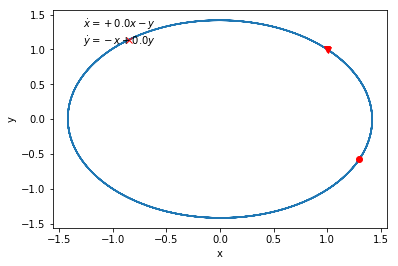

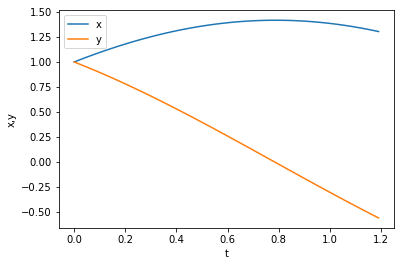

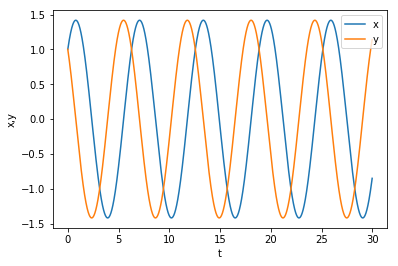

In [258]:
xo=1.0
yo=1.00
a=0.000
b=1.0
c=1
d=a
A=np.matrix([[a,b],[-c,d]])
print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
y=[yo]
Dt=0.01
t=[0]
print(x)
N=3000

def int1Step(x,y):
    x.append( x[-1] +(a*x[-1]+b*y[-1])*Dt )
    y.append( y[-1] +(-c*x[-1]+d*y[-1])*Dt )
    return [x,y]
    
i=1
while i<N:
    x,y = int1Step(x,y)
    t.append(t[-1]+Dt)
    i += 1

seq='$\dot{x}='+mystr(a)+'x'+mystr(-b)+\
             'y$\n$\dot{y}='+mystr(-c)+'x'+mystr(d)+'y$'

myplot(N,t,x,y,seq)

By varying the other parameters (a,d) we obtain different types of dynamics -not always _sustained_ oscillations.

$\dot{x} = ax+by$

$\dot{y} = dy-cx$

$\dot{{\vec r}} = A \vec{r}$

$A=\begin{bmatrix}a & b \\ -c & d\end{bmatrix}$



[[ 0.01  1.  ]
 [-1.   -0.05]] eigenvals(A)= [-0.02+0.9995499j -0.02-0.9995499j]
[5.0]
minx	maxx	miny	maxy
 -6.652870029682772 7.084619791839744 -6.870552589152591 6.451859340025461
-5.965995538606646 4.786557848878204


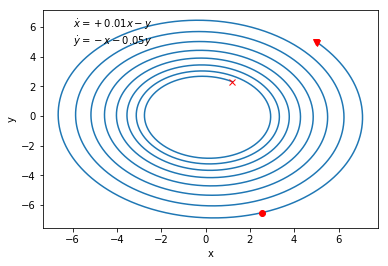

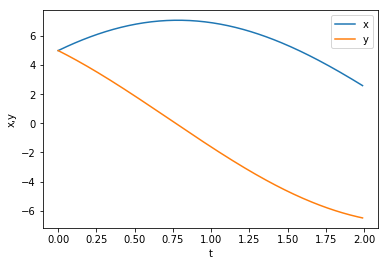

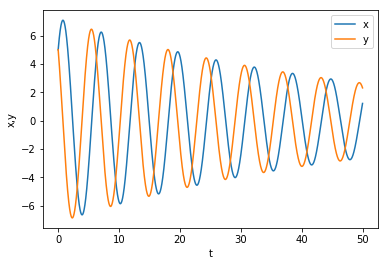

In [259]:
xo=5.0
yo=5.00
a=+0.01
b=1.0
c=+1.0
d=-0.05
A=np.matrix([[a,b],[-c,d]])
print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
y=[yo]
Dt=0.01
t=[0]
print(x)
N=5000

def int1Step(x,y):
    x.append( x[-1] +(a*x[-1]+b*y[-1])*Dt )
    y.append( y[-1] +(-c*x[-1]+d*y[-1])*Dt )
    return [x,y]
    
i=1
while i<N:
    x,y = int1Step(x,y)
    t.append(t[-1]+Dt)
    i += 1

seq='$\dot{x}='+mystr(a)+'x'+mystr(-b)+\
             'y$\n$\dot{y}='+mystr(-c)+'x'+mystr(d)+'y$'

myplot(N,t,x,y,seq)

In particular we have here the case of the cross investment with our friend that we mentioned at the beginning. This
was  as follows: your capital grows each month by 1% of what's in your account at the beginning of the month, x, **but decreases** by 0.5% of what's in your friends account at the start of the month, say $y$. Whence, at the end of a month you'll have $1.01x-0.005y$. At the same time, the capital of your friend _decreases_ say 0.5% of what's in her account each month, **but increases** by 5% of what's in your account at the start of the same month. Whence, at the end of a month she'll have $0.995y+0.05x$. 

This is an example of coupled variables that have no non-linear terms, i.e., no interactions.

$\dot{x} = 0.01x - 0.005y$

$\dot{y} = -0.005y + 0.05x$

Both capitals can be grouped together into the **portfolio** given by vector $\overrightarrow{r}=\begin{pmatrix}x\\y\end{pmatrix}$ which follows a simple linear dynamics:

$\dot{\overrightarrow{r}} = A \overrightarrow{r}$

$A=\begin{bmatrix}0.01 & -0.005 \\ 0.05 & -0.005\end{bmatrix}$

Negative stock value means it has devalued below what you initially paid for it. It's a bear market! But you may wanna hold to your investment until that **negative cycle** gives rise to another bull market period... 

[[ 0.01  -0.005]
 [ 0.05  -0.005]] eigenvals(A)= [ 0.0025+0.01391941j  0.0025-0.01391941j]
[5.0]
minx	maxx	miny	maxy
 -28.957805724224407 50.90804513645517 -111.10860243764905 194.70330214369227
-24.964513181190426 156.4768140710246


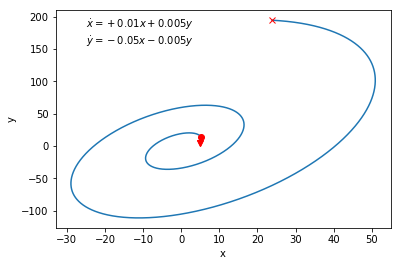

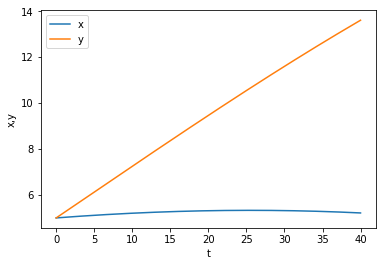

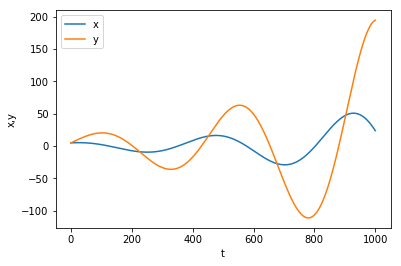

In [260]:
xo=5.0
yo=5.00
a=+0.01
b=-0.005
c=+0.05
d=b #+0.01
A=np.matrix([[a,b],[c,d]])
print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
y=[yo]
Dt=0.01
t=[0]
print(x)
N=100000

def int1Step(x,y):
    x.append( x[-1] +(a*x[-1]+b*y[-1])*Dt )
    y.append( y[-1] +(c*x[-1]+d*y[-1])*Dt )
    return [x,y]
    
i=1
while i<N:
    x,y = int1Step(x,y)
    t.append(t[-1]+Dt)
    i += 1

seq='$\dot{x}='+mystr(a)+'x'+mystr(-b)+\
             'y$\n$\dot{y}='+mystr(-c)+'x'+mystr(d)+'y$'

myplot(N,t,x,y,seq)

# System of Nonlinear dif. eq.

This is an example of a system of two variables that are coupled and have some non-linearities. Here, each variable interacts with itself, but not with each other.

$\dot{x} = ay - bx^3$

$\dot{y} = cx - dy^3$

This system already shows some kind of periodic response. If we plot $y$ versus $x$ we can see a trajectory that is turning down into a point. If we look at how each of these variables vary with time, we see  continuous oscillations that get progressively damped out.

Again, in these plots, the two triangles show the first two steps of the simulations; the dot show the system at the end of the second plot, and the red cross shows the system at the end of the third plot.


[[ 1. -1.]
 [ 1.  1.]] eigenvals(A)= [ 1.+1.j  1.-1.j]
[0.5]
minx	maxx	miny	maxy
 -0.3579888739654571 0.5900917850629002 -0.4307718360091463 0.51
-0.3105848410140392 0.39240352049885674


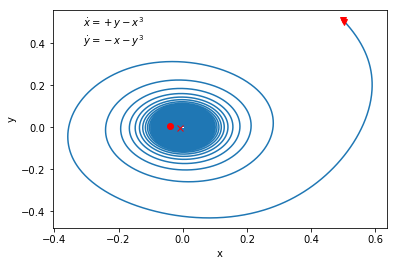

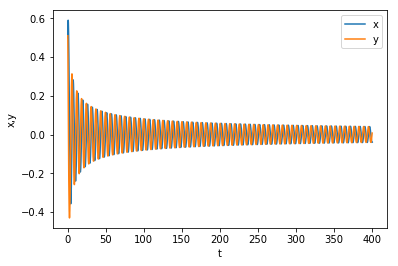

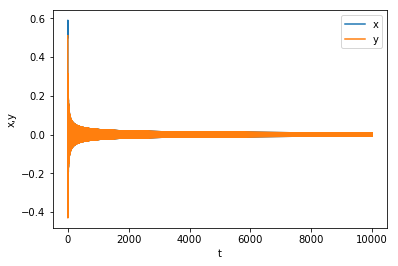

In [261]:
xo=0.5
yo=0.51
a=1.0
b=1.0
c=-1.0
d=b
A=np.matrix([[a,-b],[-c,d]])
print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
y=[yo]
Dt=0.01
t=[0]
print(x)
N=1000000

def int1Step(x,y):
    x.append( x[-1] +(a*y[-1]-b*pow(x[-1],3))*Dt )
    y.append( y[-1] +(c*x[-1]-d*pow(y[-1],3))*Dt )
    return [x,y]
    
i=1
while i<N:
    x,y = int1Step(x,y)
    t.append(t[-1]+Dt)
    i += 1

seq='$\dot{x}='+mystr(a)+'y'+mystr(-b)+'x^3$\n'+\
       '$\dot{y}='+mystr(c)+'x'+mystr(-d)+'y^3$'

myplot(N,t,x,y,seq)

# [Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations)

This is a famous and well-known simple model of the relation between a prey (x, e.g. rabbit) and its natural predator (y, e.g, fox) in an ecosystem, assuming only foxes only eat on rabbits and the latter eat from an unlimitted supply of grass.

$\dot{x} = ax - bxy$

$\dot{y} = -dy + cxy$

In the absence of the fox, the population of rabbits grows exponentially, following the dynamics

$\dot{x} = a x$

But in its pressence, both populations keep oscillating: when the foxes eat almost all rabbits, they start starving as there isn't enough food for all foxes. Once the population of foxes have depleted enough, there isn't many of them to eat more rabbits than there are born and the population of rabbits starts growing again. This in turns favors a grow in the population of foxes. An so a cycle is closed and the system starts over again.

xo= [10.175] yo= 1.1
minx	maxx	miny	maxy
 0.06527047371420874 10.180363142778017 0.0027027654328915097 7.981318012668868
0.5710251071673991 6.98399110676437


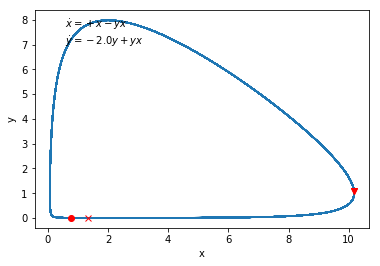

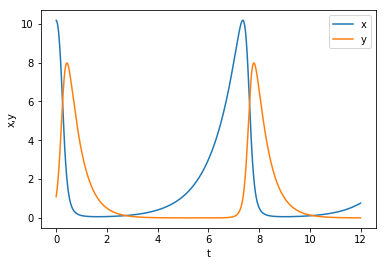

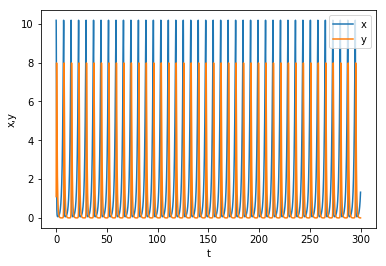

In [262]:
xo=10.175
yo=1.1
a=+1.e0
b=+1.0e0
d=+2.0e0
c=+1.0e0
#A=np.matrix([[a,-b],[-c,d]])
#print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
xid=[xo]
y=[yo]
t=[0]
print('xo=',x,'yo=',yo)
T=300
N=300000
Dt=T*1.0/N

def int1Step(x,y):
    x.append( x[-1] +(a*x[-1]-b*y[-1]*x[-1])*Dt )
    y.append( y[-1] +(-d*y[-1]+c*y[-1]*x[-1])*Dt )
    xid.append(xid[-1] +(a+d*xid[-1])*Dt)
    #xid.append(xo)
    return [x,y,xid]
    
i=1
while i<N:
    x,y,xid = int1Step(x,y)
    t.append(t[-1]+Dt)
    i += 1

seq='$\dot{x}='+mystr(a)+'x'+mystr(-b)+\
             'yx$\n$\dot{y}='+mystr(-d)+'y'+mystr(c)+'yx$'
       
myplot(N,t,x,y,seq)

## Pattern
All these previous examples have in common that they have a, let's called it, _**harmonic oscillator part**_ (highlighted in bold face)

$\mathbf{\dot{x}} = ax+\mathbf{by}$

$\mathbf{\dot{y}} = dy\mathbf{-cx}$

that gives rise to...well, oscillations, and a _**second part**_ that is responsible for the shrinking or growing of those oscillations

$\mathbf{\dot{x}} = \mathbf{ax}+by$

$\mathbf{\dot{y}} = \mathbf{dy}-cx$

This second part may or not have non-linear (interaction) terms. Among other things, this part is _**responsible for the oscillations shrinking down onto a point or spiralling out without end**_, but they can also lead to [_**chaotic behavior**_](https://en.wikipedia.org/wiki/Chaos_theory).


# [Brusselator](https://en.wikipedia.org/wiki/Brusselator)

Chemical reaction may show complex behavior that giving rise to what's known as [chemical clocks](https://en.wikipedia.org/wiki/Chemical_clock).

This is an example of a system that shows a clock **without having an explicit harmonic oscillator part** -notice the first equation has no term proportional just to $y$:

$\dot{x} = a-(b+1)x + cyx^2$

$\dot{y} = bx - cyx^2$

Without no influence at all of $y\,(b=0,\,c=0)$, we are left with the following dynamics

$\dot{w} = a-w$

However, the interaction between both components $x$ and $y$ gives rise to a periodic dynamics, i.e., to a **clock**.

xo= [0.15] yo= -1.1
minx	maxx	miny	maxy
 0.15 3.7371476340774037 -1.1 4.731995523335976
0.3293573817038702 4.002996082918979


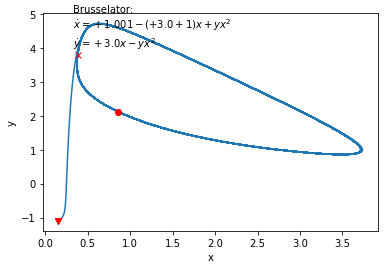

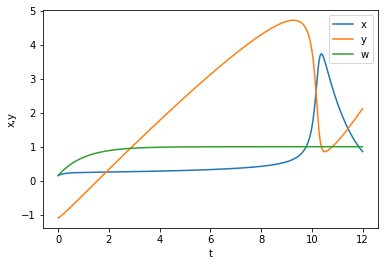

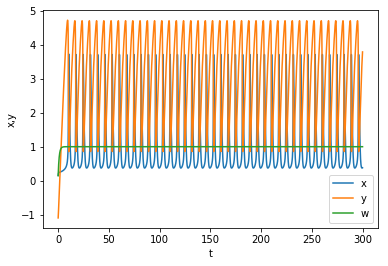

In [256]:
xo=0.15
yo=-1.1
a=+1.001e0
b=+3.0e0
c=0.0
#A=np.matrix([[a,-b],[-c,d]])
#print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
w=[xo]
y=[yo]
t=[0]
print('xo=',x,'yo=',yo)
T=300
N=300000
Dt=T*1.0/N

def int1Step(x,y):
    x.append( x[-1] +(a-(b+1)*x[-1]+y[-1]*pow(x[-1],2) )*Dt )
    y.append( y[-1] +(b*x[-1]      -y[-1]*pow(x[-1],2) )*Dt )
    w.append(w[-1] +(a-w[-1])*Dt)
    return [x,y,xid]
    
i=1
while i<N:
    x,y,xid = int1Step(x,y)
    t.append(t[-1]+Dt)
    i += 1

seq='Brusselator:\n$\dot{x}='+mystr(a)+'-('+mystr(b)+'+1)x+yx^2$\n'+\
       '$\dot{y}='+mystr(b)+'x-yx^2$'
myplot(N,t,x,y,seq,xid=w)

# [Lorenz System](https://en.wikipedia.org/wiki/Lorenz_system)

This system shows a more complicated behavior ranging from something similar to a "boring" linear system to an oscillating and a chaotic one, all depending on the values of the 3 parameters $a,r,b$. 

\begin{array}{}
\dot{x} = a(-x + y) \\
\dot{y} = -y -rx -xz \\
\dot{z} = -bz +xy 
\end{array}

Or in vectorial form:

$$\dot{\overrightarrow{\mathbf{r}}} = A\overrightarrow{\mathbf{r}} + {\mathbf f}(x,y,z)$$
with

$A=\begin{bmatrix}-a & a & 0 \\ -r & -1 & 0 \\ 0 & 0 & -b \end{bmatrix}\quad {\mathbf f}(x,y,z)=\begin{pmatrix}0 \\ -xz \\ xy\end{pmatrix}$

xo= [10.175] yo= 1.1 zo= 1.0
minx	maxx	miny	maxy
 -21.156254746422874 25.138431974716422 -29.918377417975528 37.85562751104722
-18.84152041036591 29.383876894919375


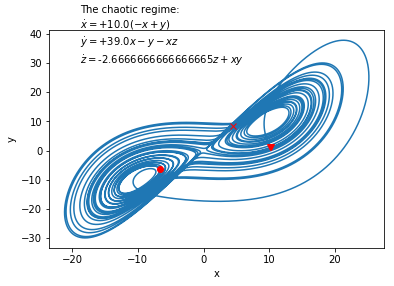

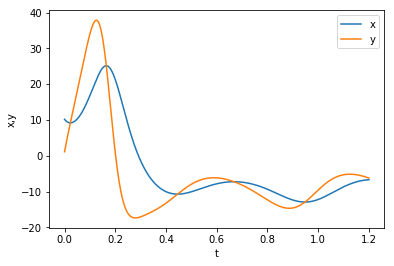

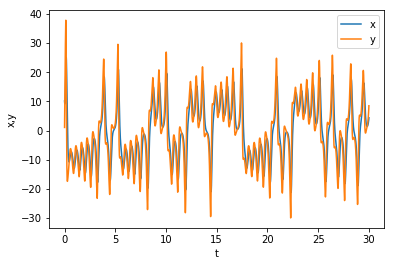

In [264]:
xo=10.175
yo=1.1
zo=1.0
a=+1.e1
r=+3.9e1
b=+8.0/3.0
#A=np.matrix([[a,-b],[-c,d]])
#print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
xid=[xo]
y=[yo]
z=[zo]
t=[0]
print('xo=',x,'yo=',yo,'zo=',zo)
T=30
N=300000
Dt=T*1.0/N

def int1Step(x,y):
    x.append( x[-1] +(-a*x[-1]+a*y[-1]                     )*Dt )
    y.append( y[-1] +( r*x[-1]-  y[-1]        -x[-1]*z[-1] )*Dt )
    z.append( z[-1] +(                -b*z[-1]+x[-1]*y[-1] )*Dt )
    #xid.append(xid[-1] +(a+d*xid[-1])*Dt)
    #xid.append(xo)
    return [x,y,xid]
    
i=1
while i<N:
    x,y,xid = int1Step(x,y)
    t.append(t[-1]+Dt)
    i += 1

seq='The chaotic regime:\n'+\
       '$\dot{x}=$'+mystr(a)+'$(-x+y)$\n'+\
       '$\dot{y}=$'+mystr(r)+'$x-y-xz$\n'+\
       '$\dot{z}=$'+mystr(-b)+'$z+xy$'
       
myplot(N,t,x,y,seq,xid=None)


# [Rössler System](https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor)

This is a slight variant of the Lorenz system that is sometimes used as a [model](https://www.google.ca/url?sa=t&rct=j&q=&esrc=s&source=web&cd=4&cad=rja&uact=8&ved=0ahUKEwjR4K2gsNzWAhUn8IMKHVGLAhYQFgg7MAM&url=https%3A%2F%2Fdspace.mit.edu%2Fopenaccess-disseminate%2F1721.1%2F67466&usg=AOvVaw21xjUBWZw8OMRMY7GdmX1L) of the [heart beat](http://cdn.quantumintech.com/emwave-pro-library/asmts-hrv.html).

\begin{array}{}
\dot{x} = ax + y \\
\dot{y} = -x -z \\
\dot{z} = b-cz +zy 
\end{array}

Or in vectorial form:

$$\dot{\overrightarrow{\mathbf{r}}} = A\overrightarrow{\mathbf{r}} + {\mathbf f}(x,y,z)$$
with

$A=\begin{bmatrix}a & 1 & 0 \\ -1 & 0 & -1 \\ 0 & 0 & -c \end{bmatrix}\quad {\mathbf f}(x,y,z)=\begin{pmatrix}0 \\ 0 \\ b+zy\end{pmatrix}$


[[  0.15   1.     0.  ]
 [ -1.     0.    -1.  ]
 [  0.     0.   -10.  ]] eigenvals(A)= [  0.075+0.99718353j   0.075-0.99718353j -10.000+0.j        ]
xo= 2.5 yo= -0.1 zo= 30.0
len xs 10000
minx	maxx	miny	maxy
 -16.484253699485212 12.999070210253205 -14.561121617480733 17.311041036189398
-15.01008750399829 13.327020704480631


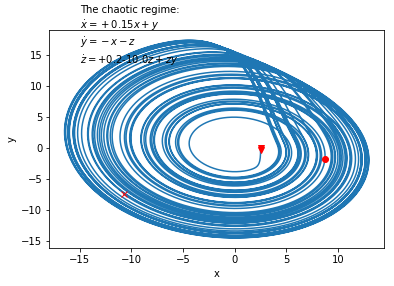

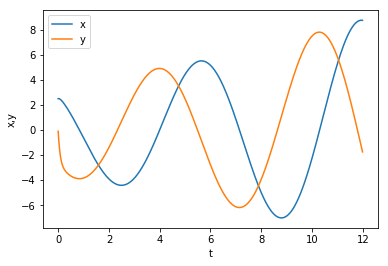

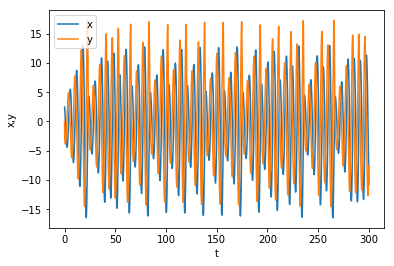

minx	maxx	minv=(z+x)	maxv=(z+x)
 -16.484253699485212 12.999070210253205 -16.4617197684 35.9106764528
-15.01008750399829 29.3641269251


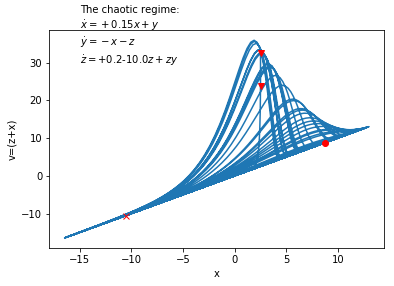

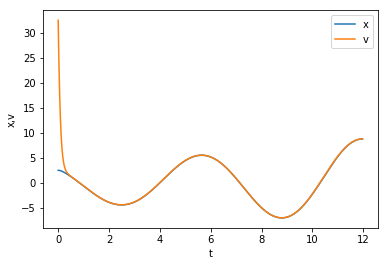

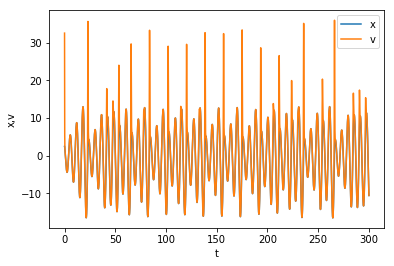

In [266]:
xo=+2.5
yo=-0.1
zo=30.0
a=+1.5e-1
b=+2.0e-1
c=+1.0e1
A=np.matrix([[a,1,0],[-1,0,-1],[0,0,-c]])
print(A,'eigenvals(A)=',np.linalg.eigvals(A) )
x=[xo]
xid=[xo]
y=[yo]
z=[zo]
t=[0]
print('xo=',xo,'yo=',yo,'zo=',zo)
T=300
N=30000
Dt=T*1.0/N

def int1Step(x,y):
    x.append( x[-1] +( a*x[-1]+  y[-1]                     )*Dt )
    y.append( y[-1] +(  -x[-1]        -  z[-1]             )*Dt )
    z.append( z[-1] +(b               -c*z[-1]+z[-1]*y[-1] )*Dt )
    #xid.append(xid[-1] +(a+d*xid[-1])*Dt)
    #xid.append(xo)
    return [x,y,xid]
    
xs=[xo];ys=[yo];zs=[zo];ts=[0]

i=1
while i<N:
    x,y,xid = int1Step(x,y)
    t.append(t[-1]+Dt)
    if i%3 == 0:      #Subsampling the dynamics
        xs.append(x[i])
        ys.append(y[i])
        zs.append(z[i])
        ts.append(t[i])

    i += 1
print('len xs',len(xs))    
seq='The chaotic regime:\n$\dot{x}='+mystr(a)+'x+y$\n'+\
       '$\dot{y}=-x-z$\n'+\
       '$\dot{z}=$'+mystr(b)+mystr(-c)+'$z+zy$'
        
myplot(len(t),t,x,y,seq,ylabel='y',xylabel='x,y',legend2='xy')
myplot(len(ts),ts,xs,np.array(zs)+np.array(xs),seq,ylabel='v=(z+x)',xylabel='x,v',legend2='xv')

# Man made clocks

A Quartz clock depends on a tiny stick-like quartz crystall that bends back and forth when we apply some voltage to it -there is why we need the battery for. In these clocks the quartz crystall vibrates at its _natural frequency_, which is given the atomic properties of its crystall structure. Those vibrations are then use either to move the hands of an analog watch or to generate a pulsating voltage in a circuit that triggers the switching of the digits in the display of a digital watch.

In an atom clock, we still use a quartz crystall to count the passage of time in the same way as with a Quartz watch. The difference lies here in that we control the frequency of the quartz vibrations through the repeated transitions between two excited states of an atom, e.g. Cesium[$^\dagger$](http://www.explainthatstuff.com/howradiocontrolledclockswork.html). 

